# Grafics with matplotlib.pyplot
VO Maschinelles Lernen in der Produktion, WS2018/19, Moritz von Unold

#### Erstellen von Grafiken mit matplotlib.pyplot.

In [15]:
# Imports und Beispieldaten

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8], 
                   'y_1': [2, 3, 2, 4, 5, 4, 7, 8],
                   'y_2': [1, 3, 5, 7, 9, 8, 12, 20]})

In [16]:
# Standard Graph

plt.plot(df['x'], df['y_1'])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

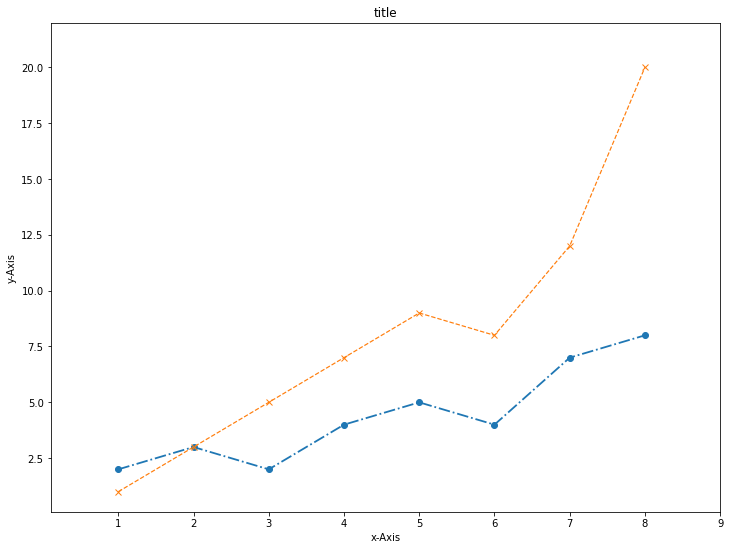

In [8]:
# Vorlage benutzerdefinierter Graph

plt.figure(figsize=(12, 9))  # Größe des Graphs
plt.plot(df['x'], df['y_1'], alpha=1, marker='o', linewidth=1.8, linestyle='-.')  # Linie von x, y_1
plt.plot(df['x'], df['y_2'], alpha=1, marker='x', linewidth=1.2, linestyle='--')  # Linie von x, y_2

#plt.yscale('log')  # Logarithmische y-Achse setzen
plt.xlim(0.1, 9)  # Grenzen der x-Achse des Graphs
plt.ylim(0.1, 22)  # Grenzen der y-Achse des Graphs

plt.title('title')  # Beschriftung Überschrift
plt.xlabel('x-Axis')  # Beschriftung x-Achse
plt.ylabel('y-Axis')  # Beschriftung y-Achse

plt.show()  # Zeige Graph an

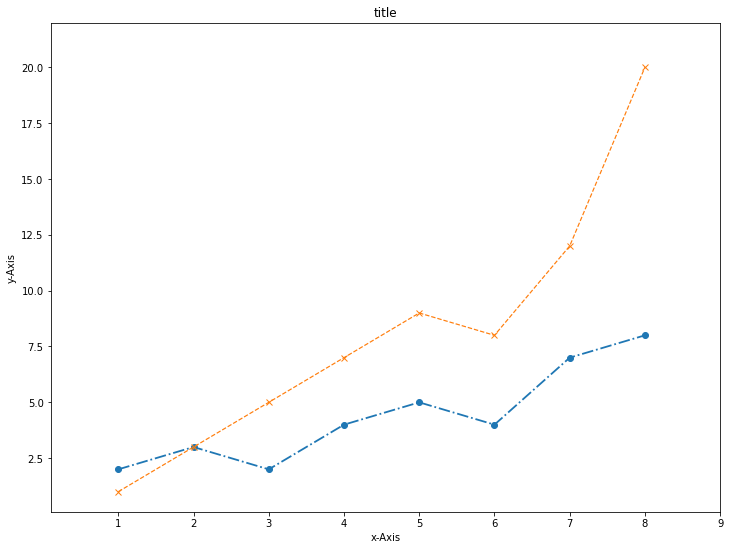

In [9]:
# Vorlage benutzerdefinierter Graph - Achtung zweimal kompilieren

plt.figure(figsize=(12, 9))  # Größe des Graphs
plt.plot(df['x'], df['y_1'], alpha=1, marker='o', linewidth=1.8, linestyle='-.')  # Linie von x, y_1
plt.plot(df['x'], df['y_2'], alpha=1, marker='x', linewidth=1.2, linestyle='--')  # Linie von x, y_2

#plt.yscale('log')  # Logarithmische y-Achse setzen
plt.xlim(0.1, 9)  # Grenzen der x-Achse des Graphs
plt.ylim(0.1, 22)  # Grenzen der y-Achse des Graphs

plt.title('title')  # Beschriftung Überschrift
plt.xlabel('x-Axis')  # Beschriftung x-Achse
plt.ylabel('y-Axis')  # Beschriftung y-Achse
plt.rcParams.update({'font.size': 20})  # Schriftgröße aller Textzeichen im Graphen

plt.show()  # Zeige Graph an

Code-Beispiele für Graph-Varianten:
https://matplotlib.org/tutorials/introductory/sample_plots.html

## Mehrdim. Konfusionsmatrix

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [13]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
cm=confusion_matrix(y_test_arg, y_pred)
plt.figure(figsize=(16,9))
plt.title('Confusion matrix ',fontsize = 25)
target_names = ['OK', 'Mangelschmierung','Pitting V1','Pitting V2','Pitting V3/V4']
ax=sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',yticklabels=target_names,xticklabels=target_names)
ax.set_ylabel('True label',fontsize = 19)
ax.set_xlabel('Predicted label',fontsize = 19)

# show Classification Report
print('Classification Report')
print(classification_report(y_test_arg, y_pred, target_names=target_names))

NameError: name 'y_test' is not defined

## Loss- und Accuracy Curve (History DL)

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc) +1)

plt.figure(figsize=(16,9))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.xlabel('Epochs',fontsize = 19)
plt.title('Training accuracy '+model_name,fontsize = 25)
plt.legend()

plt.figure(figsize=(16,9))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs',fontsize = 19)
plt.title('Training loss '+model_name,fontsize = 25)
plt.legend()

plt.show()

## Schriftgröße, Schriftart, Verlaufsplots

In [ ]:
## Optionales Laden von Opensans für Grafikbeschriftung: 
import matplotlib.font_manager as fm
# Achtung muss noch getestet werden!
if os.path.exists('c:/windows/fonts/opensans-regular.ttf'):
    font_prop_label = fm.FontProperties(fname='c:/windows/fonts/opensans-regular.ttf', size=14)
    font_prop_title = fm.FontProperties(fname='c:/windows/fonts/opensans-regular.ttf', size=16)
else:
    font_prop_label = fm.FontProperties(size=14)
    font_prop_title = fm.FontProperties(size=16)

In [ ]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
fig = plt.figure(figsize=(12, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.set_xlabel("Zeit Windows")
host.set_ylabel("rel. Luftfeuchte [%]")
host.axis["right"].set_visible(False)

par1.axis["right"].set_visible(True)
par1.set_ylabel("abs. Luftfeuchte [mg/m3]")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Feuchtigkeitsgrad [g/kg]")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

p1, = host.plot(sensorrohr_df['System-Time'], sensorrohr_df['Rohgas Relative humidity [%]'], alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Rohgas relative Luftfeuchtigkeit')
p1, = host.plot(sensorrohr_df['System-Time'], sensorrohr_df['Reingas Relative humidity [%]'], alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Reingas relative Luftfeuchtigkeit')
p2, = par1.plot(sensorrohr_df['System-Time'], sensorrohr_df['Rohgas Absolute humidity [g/m3]'], alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Rohgas absolute Luftfeuchtigkeit')
p2, = par1.plot(sensorrohr_df['System-Time'], sensorrohr_df['Reingas Absolute humidity [g/m3]'], alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Reingas absolute Luftfeuchtigkeit')
p3, = par2.plot(sensorrohr_df['System-Time'], sensorrohr_df['Rohgas Humidity grade [g/kg]'], alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Rohgas humidity grade')
p3, = par2.plot(sensorrohr_df['System-Time'], sensorrohr_df['Reingas Humidity grade [g/kg]'], alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Reingas humidity grade')

host.legend()
host.grid()
#plt.savefig(os.path.join(subpath_plots, 'humidity_sensor_humidity.png'), bbox_inches='tight')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.figure(figsize=(12, 9))
ax2 = ax1.twinx()
lns1 = ax1.plot(flow_df['System-Time'], flow_df['Rohgas Volume flow [m3/h]'], 'g', alpha=1, marker='x', linewidth=1.8, linestyle='-.', label='Rohgas Volumen flow')
lns2 = ax1.plot(flow_df['System-Time'], flow_df['Reingas Volume flow [m3/h]'], 'r', alpha=1, marker='x', linewidth=1.8, linestyle='-.', label='Reingas Volumen flow')
lns3 = ax2.plot(flow_df['System-Time'], flow_df['Rohgas Air velocity [m/s]'], 'b', alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Rohgas Speed')
lns4 = ax2.plot(flow_df['System-Time'], flow_df['Reingas Air velocity [m/s]'], 'k', alpha=1, marker='o', linewidth=1.8, linestyle='-.', label='Reingas Speed')

ax1.set_xlabel('Zeit Windows')
ax1.set_ylabel('Volumenflow [m^3/h]')
ax2.set_ylabel('Speed [m/s]')


lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()